In [1]:
%cd C:\Users\Admin\Desktop\Python Bootcamp

C:\Users\Admin\Desktop\Python Bootcamp


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('aug_train.csv')
df_raw = df.copy()
df_test = pd.read_csv('aug_test.csv')

In [4]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
df.shape

(19158, 14)

In [7]:
df.dropna(axis = 0, thresh = 10, inplace = True)

In [8]:
df.shape

(18908, 14)

In [9]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4300
relevent_experience          0
enrolled_university        271
education_level            284
major_discipline          2572
experience                  46
company_size              5695
company_type              5894
last_new_job               335
training_hours               0
target                       0
dtype: int64

## City

In [10]:
# Keep only the numeric part of the city, name rows using the number
df['city'] = df['city'].str.replace(r'\D', '', regex=True).astype(int)

In [11]:
df['city'].max()

180

In [12]:
df['city'].min()

1

In [13]:
def city_size(number):
    if number >=100:
        return 'large city'
    else:
        return 'small city'

In [14]:
df['city'] = df['city'].apply(city_size)

In [15]:
# Transform categroical variables into numbers
le = LabelEncoder().fit(df['city'])
df['city'] = le.transform(df['city'])

In [16]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'large city': 0, 'small city': 1}

<Axes: >

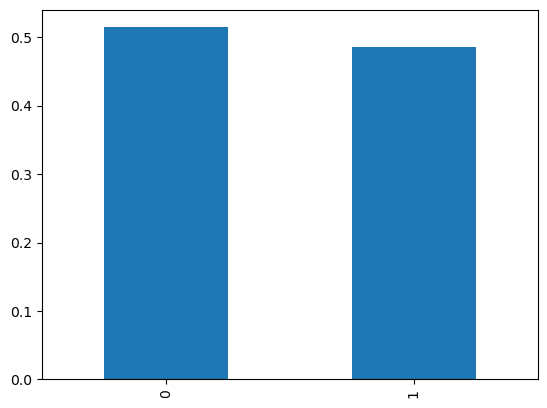

In [17]:
df['city'].value_counts(normalize=True).plot(kind='bar')


## City Development

<Axes: xlabel='city_development_index'>

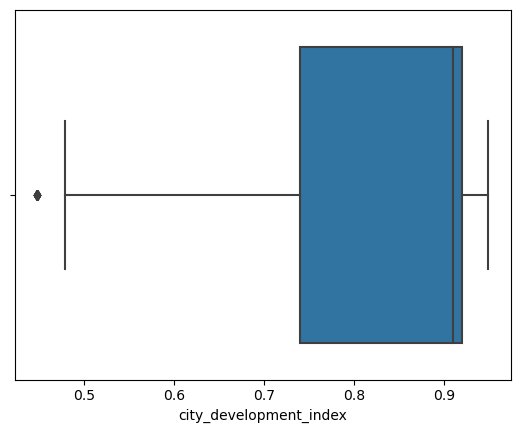

In [18]:
# Check outliers
sns.boxplot(x=df['city_development_index'])

In [19]:
q1 = np.percentile(df['city_development_index'], 0.25)
q3 = np.percentile(df['city_development_index'], 0.75)
iqr = q3 - q1
iqr

0.03400000000000003

In [20]:
# find outliers
lw_bnd = q1 - 1.5*iqr
up_bnd = q3 + 1.5*iqr
df.loc[(df['city_development_index'] <= lw_bnd) | (df['city_development_index'] >= up_bnd)]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,1,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,0,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,0,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,1,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Gender

In [21]:
# Fill NA with Other
df['gender'].fillna('Other',inplace = True)

<Axes: >

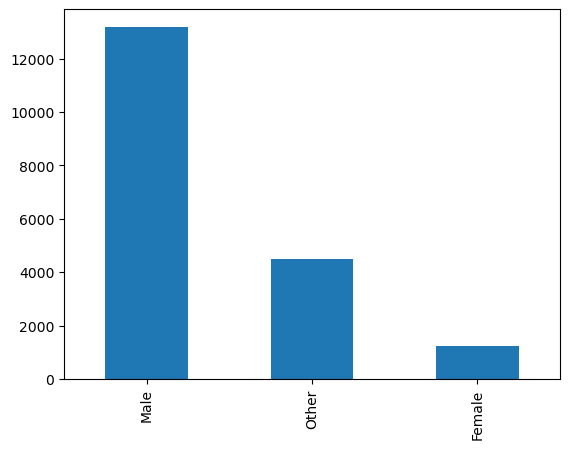

In [22]:
df['gender'].value_counts().plot(kind = 'bar')

In [23]:
#One Hot Encoding
gender_ohe = pd.get_dummies(df['gender'], prefix = 'gender')
df = df.loc[:, df.columns != 'gender'].join(gender_ohe)


In [24]:
df 

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other
0,8949,0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0
1,29725,1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0
2,11561,1,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,1
3,33241,0,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0,1
4,666,0,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0.878,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,0,1,0
19154,31398,0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,0,1,0
19155,24576,0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,0,1,0
19156,5756,1,0.802,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0,1,0


In [25]:
## Relevant Experience
le = LabelEncoder().fit(df['relevent_experience'])
df['relevent_experience'] = le.transform(df['relevent_experience'])

In [26]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'Has relevent experience': 0, 'No relevent experience': 1}

In [27]:
df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other
0,8949,0,0.920,0,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0,1,0
1,29725,1,0.776,1,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0
2,11561,1,0.624,1,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0,0,1
3,33241,0,0.789,1,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0,0,1
4,666,0,0.767,0,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0.878,1,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,0,1,0
19154,31398,0,0.920,0,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,0,1,0
19155,24576,0,0.920,0,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,0,1,0
19156,5756,1,0.802,0,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0,1,0


## ENROLLED_UNIVERSITY

In [28]:
df.enrolled_university.value_counts(dropna=False,normalize=True)

no_enrollment       0.726095
Full time course    0.196689
Part time course    0.062883
NaN                 0.014333
Name: enrolled_university, dtype: float64

<Axes: >

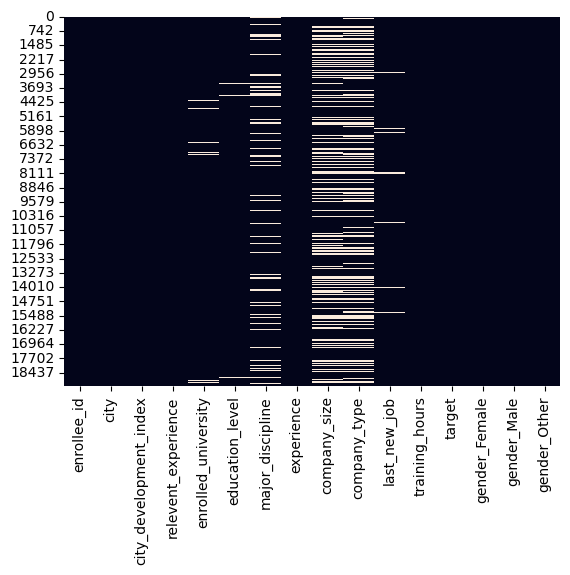

In [29]:
sns.heatmap(df.isnull(), cbar=False)

In [30]:
df['enrolled_university'].fillna('Unknown' ,inplace=True)

In [31]:
le_enrolled_university = LabelEncoder().fit(df['enrolled_university'])
df['enrolled_university'] = le_enrolled_university.transform(df['enrolled_university'])
# Keep the record of labeling
dict(zip(le_enrolled_university.classes_, le_enrolled_university.transform(le_enrolled_university.classes_)))

{'Full time course': 0,
 'Part time course': 1,
 'Unknown': 2,
 'no_enrollment': 3}

<Axes: >

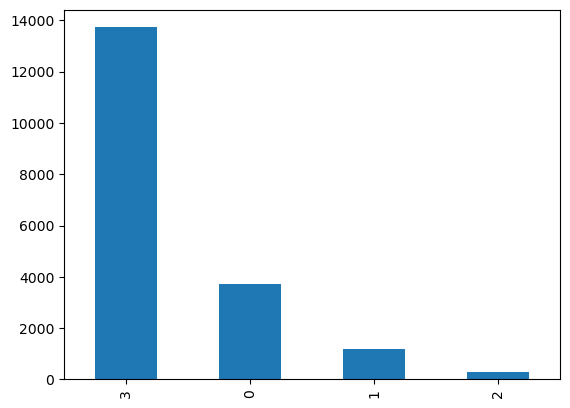

In [32]:
df['enrolled_university'].value_counts().plot(kind = 'bar')

## Education

In [33]:
le_education_level = LabelEncoder().fit(df['education_level'])
df['education_level'] = le_education_level.transform(df['education_level'])
# Keep the record of labeling
dict(zip(le_education_level.classes_, le_education_level.transform(le_education_level.classes_)))

{'Graduate': 0,
 'High School': 1,
 'Masters': 2,
 'Phd': 3,
 'Primary School': 4,
 nan: 5}

In [34]:
le_education_level = LabelEncoder().fit(df['education_level'])
df['education_level'] = le_education_level.transform(df['education_level'])
# Keep the record of labeling
dict(zip(le_education_level.classes_, le_education_level.transform(le_education_level.classes_)))

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

## Major discipline

In [35]:
df['major_discipline'].fillna('other' ,inplace=True)
# One - Hot encoding 
major_ohe = pd.get_dummies(df.major_discipline, prefix='major')

#merge one-hot encoded columns back with original DataFrame
df = df.loc[:, df.columns != 'major_discipline'].join(major_ohe)

## Company size

In [36]:

df.company_size.value_counts(dropna=False)

NaN          5695
50-99        3083
100-500      2568
10000+       2018
10/49        1469
1000-4999    1328
<10          1307
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [37]:
df['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+',],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)
df['company_size'] = df['company_size'].fillna(df['company_size'].value_counts().index[0]) # inpute with mode
CSizeLabelEncoder = LabelEncoder().fit(df['company_size'])
CSizeList = CSizeLabelEncoder.classes_
df['company_size'] = CSizeLabelEncoder.transform(df['company_size'])

## experience

In [38]:
df['experience'].replace(['>20','<1'],[20,1],inplace=True)
df['experience'].fillna(df['experience'].value_counts().index[0],inplace=True) # fillna with mode
df['experience'] = [float(i) for i in df['experience']] # convert to float

## company_type

In [39]:
# fillna as other
df['company_type'].fillna('Other' ,inplace=True)
company_ohe = pd.get_dummies(df.company_type, prefix='company_type')

#merge one-hot encoded columns back with original DataFrame
df = df.loc[:, df.columns != 'company_type'].join(company_ohe)

## last new job

In [40]:
df['last_new_job'].replace(['>4','never'],['4','0'],inplace=True)
df['last_new_job'].fillna(df['last_new_job'].value_counts().index[0],inplace=True)

## validate data

In [41]:
df.drop('enrollee_id', axis=1, inplace=True)
df.head(5)

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,major_No Major,major_Other,major_STEM,major_other,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0,0.920,0,3,0,20.0,2,1,36,1.0,...,0,0,1,0,0,0,0,1,0,0
1,1,0.776,1,3,0,15.0,2,4,47,0.0,...,0,0,1,0,0,0,0,0,0,1
2,1,0.624,1,0,0,5.0,2,0,83,0.0,...,0,0,1,0,0,0,0,1,0,0
3,0,0.789,1,2,0,1.0,2,0,52,1.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.767,0,3,2,20.0,2,4,8,0.0,...,0,0,1,0,0,1,0,0,0,0


## Train and Test

In [42]:
df.target.value_counts()

0.0    14190
1.0     4718
Name: target, dtype: int64

In [43]:
# Oversampling
from imblearn.over_sampling import SMOTE
X = df.loc[:, df.columns != 'target']
Y = df.loc[:, df.columns == 'target']
oversample = SMOTE(random_state=42, sampling_strategy=0.6)
X_smote, Y_smote = oversample.fit_resample(X,Y)

In [44]:
Y_smote.value_counts(normalize = True)

target
0.0       0.625
1.0       0.375
dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size = 0.3, random_state = 42, shuffle = True, stratify = Y_smote)

In [46]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

## Random Forest


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
# Train the model on training data
rf.fit(X_train,Y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1928\1683045407.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [52]:
rf.feature_importances_

array([0.02296923, 0.22453843, 0.0193789 , 0.03433892, 0.03792956,
       0.12690978, 0.04270881, 0.07219396, 0.19283901, 0.01451228,
       0.01840956, 0.02002241, 0.00269866, 0.00381933, 0.00523165,
       0.00235243, 0.0037195 , 0.01282791, 0.01547414, 0.00936288,
       0.01691947, 0.00996699, 0.03022646, 0.01301021, 0.0476395 ])

In [58]:
Y_rf = rf.predict(X_test)
Y_rf

array([1., 0., 0., ..., 0., 0., 1.])

In [63]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(Y_test, Y_rf)
print('Accuracy: %.2f%%' % (accuracy_rf * 100.0))

Accuracy: 80.39%


## XGBoost


In [47]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
Y_train = pd.read_csv('Y_train.csv')
Y_test = pd.read_csv('Y_test.csv')

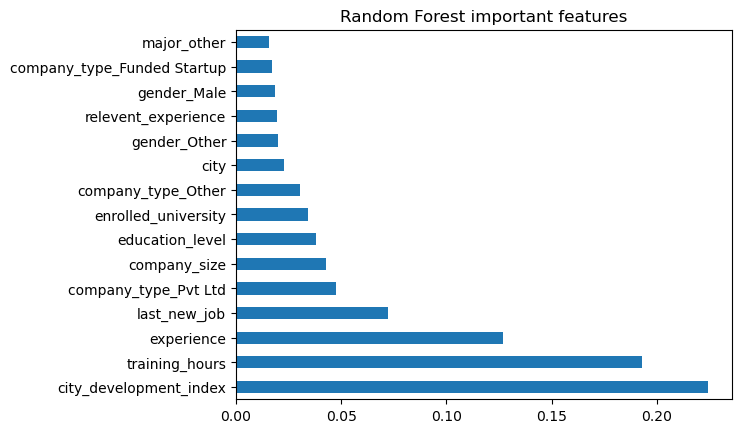

In [55]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Random Forest important features")
plt.show()

## GridSearch

In [65]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

forest_params = [{'max_depth': [10,15,20], 'max_features': [0,5,10]}]

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train.to_numpy(), Y_train.to_numpy().ravel())

print(clf.best_params_)

print(clf.best_score_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-package

{'max_depth': 15, 'max_features': 10}
0.8107861833121579


In [69]:
rf_2 = RandomForestClassifier(random_state = 42, max_depth= 15, max_features= 10)

rf_2.fit(X_train,Y_train)

accuracy = accuracy_score(Y_test, Y_rf)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

import pickle

pickle.dump(rf_2, open('rf_model.pkl','wb')) # save the model

rf_model = pickle.load(open('rf_model.pkl','rb'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_1928\3919361329.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_2.fit(X_train,Y_train)


Accuracy: 80.39%


## XGBOOST

In [70]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.53%


<Axes: >

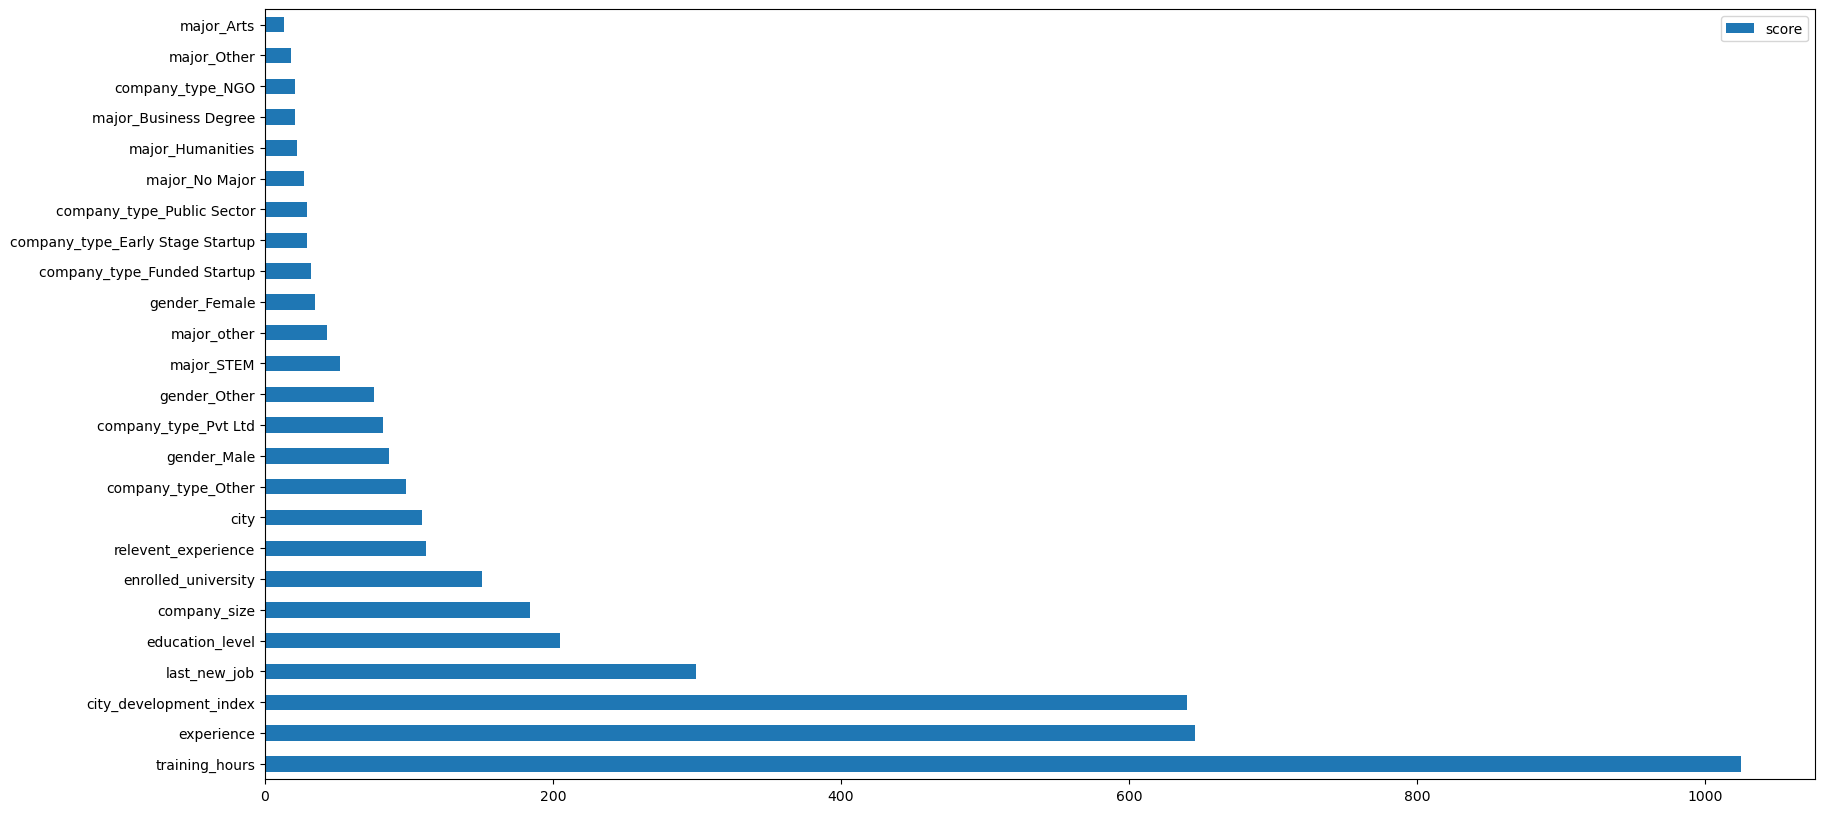

In [71]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features